In [3]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt

%matplotlib inline
warnings.filterwarnings('ignore')
sns.set(color_codes = True, style = 'ticks')

from sklearn import linear_model
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report

In [4]:
nlpo = pd.read_csv('C:\\Users\\Yuvaraj_Subramanian\\Downloads\\Projects\\Real or Not NLP with Disaster Tweets\\nlp-getting-started\\train.csv')
nlpo.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
nlp = nlpo.drop('id', axis = 1)

In [6]:
y = nlp['target']
X = nlp['text']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 43)

In [8]:
vect = CountVectorizer(stop_words = 'english')

In [9]:
vect.fit(X_train)
X_traint = vect.fit_transform(X_train)
X_testt = vect.transform(X_test)

## Naive Bayes

### Base model

In [10]:
X_traint.shape

(5329, 16706)

In [11]:
mnb = MultinomialNB()

Confusion Matrix - Train: 
 [[2951  117]
 [ 251 2010]]


Overall Accuracy - Train:  0.9309438919121786
AUC - Train:  0.9751547122657477




Confusion Matrix - Test: 
 [[1101  173]
 [ 264  746]]


Overall Accuracy - Test:  0.8086690017513135
AUC - Test:  0.864792032578454


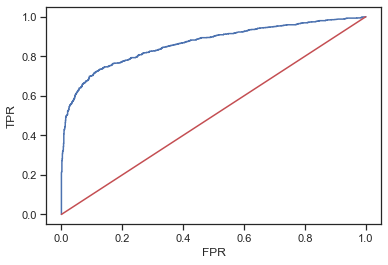

In [12]:
mnb.fit(X_traint, y_train)

y_train_pred = mnb.predict(X_traint)
y_train_prob = mnb.predict_proba(X_traint)[:,1]

print('Confusion Matrix - Train: \n', confusion_matrix(y_train, y_train_pred))
print('\n')
print('Overall Accuracy - Train: ', accuracy_score(y_train, y_train_pred))
print('AUC - Train: ', roc_auc_score(y_train, y_train_prob))
print('\n')

y_test_pred = mnb.predict(X_testt)
y_test_prob = mnb.predict_proba(X_testt)[:,1]

print('\n')
print('Confusion Matrix - Test: \n', confusion_matrix(y_test, y_test_pred))
print('\n')
print('Overall Accuracy - Test: ', accuracy_score(y_test, y_test_pred))
print('AUC - Test: ', roc_auc_score(y_test, y_test_prob))

fpr,tpr, threasholds = roc_curve(y_test, y_test_prob)
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, 'r')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

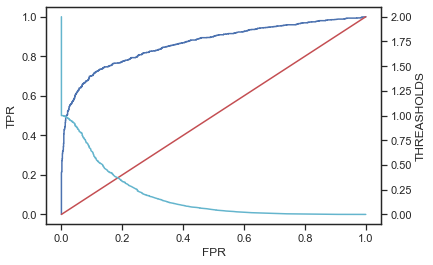

In [13]:
fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot(fpr, fpr, 'r')
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')
ax1 = ax.twinx()
ax1.set_ylabel('THREASHOLDS')
ax1.plot(fpr, threasholds, 'c')
plt.show()

In [14]:
val = pd.DataFrame({'fpr': fpr, 'tpr': tpr, 'threasholds': threasholds})
val.head(5)

,fpr,tpr,threasholds
0,0.0,0.000000,2.0
1,0.0,0.000990,1.0
2,0.0,0.002970,1.0
3,0.0,0.005941,1.0
4,0.0,0.006931,1.0


## Hyper Paramater Tuning

### Ramdomized Search

In [27]:
params = {
          'alpha': sp_randint(0.01,10)
         }

rsearch = RandomizedSearchCV(mnb, param_distributions = params, n_iter = 200, cv = 3, scoring = 'roc_auc', \
                   random_state = 43, return_train_score = True, n_jobs = -1)

rsearch.fit(train_vector, y)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                           fit_prior=True),
                   iid='deprecated', n_iter=200, n_jobs=-1,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000186AC45A630>},
                   pre_dispatch='2*n_jobs', random_state=43, refit=True,
                   return_train_score=True, scoring='roc_auc', verbose=0)

In [28]:
rsearch.best_params_

{'alpha': 2}

### Build model again

In [29]:
mnb = MultinomialNB(**rsearch.best_params_)

Confusion Matrix - Train: 
 [[2923  145]
 [ 327 1934]]


Overall Accuracy - Train:  0.9114280352786639
AUC - Train:  0.961620776767442




Confusion Matrix - Test: 
 [[1111  163]
 [ 273  737]]


Overall Accuracy - Test:  0.809106830122592
AUC - Test:  0.8654359077980012


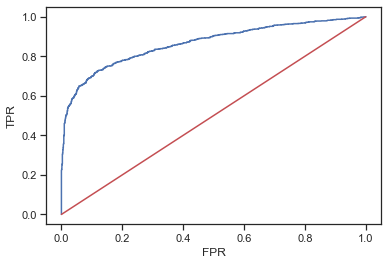

In [30]:
mnb.fit(X_traint, y_train)

y_train_pred = mnb.predict(X_traint)
y_train_prob = mnb.predict_proba(X_traint)[:,1]

print('Confusion Matrix - Train: \n', confusion_matrix(y_train, y_train_pred))
print('\n')
print('Overall Accuracy - Train: ', accuracy_score(y_train, y_train_pred))
print('AUC - Train: ', roc_auc_score(y_train, y_train_prob))
print('\n')

y_test_pred = mnb.predict(X_testt)
y_test_prob = mnb.predict_proba(X_testt)[:,1]

print('\n')
print('Confusion Matrix - Test: \n', confusion_matrix(y_test, y_test_pred))
print('\n')
print('Overall Accuracy - Test: ', accuracy_score(y_test, y_test_pred))
print('AUC - Test: ', roc_auc_score(y_test, y_test_prob))

fpr,tpr, threasholds = roc_curve(y_test, y_test_prob)
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, 'r')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

# Test Data_Set

In [31]:
nlp_test = pd.read_csv('C:\\Users\\Yuvaraj_Subramanian\\Downloads\\Projects\\Real or Not NLP with Disaster Tweets\\nlp-getting-started\\test.csv')
nlp_test.head(2)

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."


In [32]:
X_test = nlp_test['text']

In [33]:
train_vector = vect.fit_transform(X)
test_vector = vect.transform(X_test)

In [34]:
print('Train Vector shape:', train_vector.shape)
print('Test Vector shape:', test_vector.shape)

Train Vector shape: (7613, 21363)
Test Vector shape: (3263, 21363)


In [35]:
print('Train Target shape:', y.shape)
print('Train Text shape:', X.shape)

Train Target shape: (7613,)
Train Text shape: (7613,)


### Naive Bayes

In [36]:
mnb.fit(train_vector, y)

train_predictions = mnb.predict(train_vector)
print('Confusion Matrix - Train: \n', confusion_matrix(y_train, y_train_pred))

Confusion Matrix - Train: 
 [[2923  145]
 [ 327 1934]]


In [37]:
test_predictions = mnb.predict(test_vector)
test_predictions

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [38]:
sample_submission = pd.read_csv('C:\\Users\\Yuvaraj_Subramanian\\Downloads\\Projects\\Real or Not NLP with Disaster Tweets\\nlp-getting-started\\sample_submission.csv')
sample_submission.head()

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


In [39]:
sample_submission["target"] = test_predictions
sample_submission.head(2)

,id,target
0,0,1
1,2,1
